In [48]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import cv2
import os
import visualkeras
from PIL import ImageFont
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
# özellik çıkaran ön eğitimli cnn modeli
conv_base = tensorflow.keras.applications.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3)
                  )

In [50]:
# modelin parametre  sayısı ve katmanları
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [51]:
# modelin block5_conv1'den sonraki katmanları kullanılacağından öncekiler dondurulur.
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

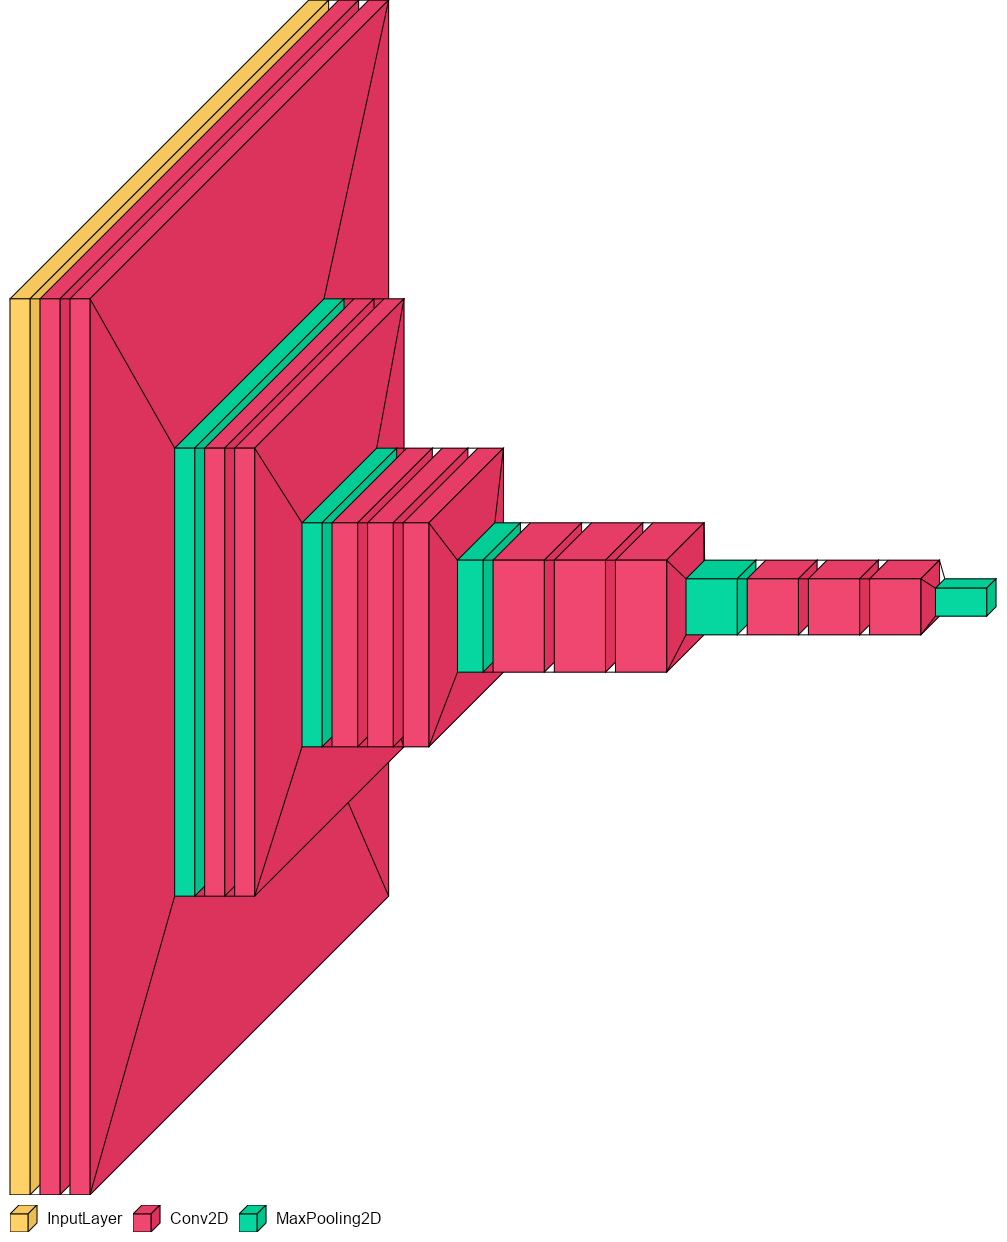

In [52]:
#modelin görselleştirilmiş hali
visualkeras.layered_view(conv_base, legend=True, font=ImageFont.truetype("arial.ttf", 16))

In [53]:
# Boş bir model oluşturuldu
model = tensorflow.keras.models.Sequential([
]
    )


In [54]:

# VGG16 modeli boş modele eklendi
model.add(conv_base)

In [55]:

# Flattening katmanı eklendi
model.add(tensorflow.keras.layers.Flatten())

In [56]:
# Yapay sinir ağını oluturan katmanlar eklendi. 4 sınıf olduğundan çıkışın 4 tane olacağını belirttik
model.add(tensorflow.keras.layers.Dense(256, activation='relu')) #eklenecek nöron sayısı
model.add(tensorflow.keras.layers.Dense(4, activation='softmax')) # sınıf sayısı

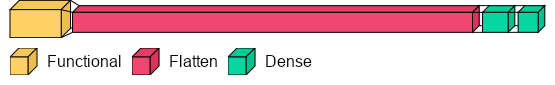

In [57]:
# kendi eklediğimiz katmanlarla birlikte oluşan modelin görselleştirilmiş hali
visualkeras.layered_view(model, legend=True, font=ImageFont.truetype("arial.ttf", 16))

In [58]:
#model compile edildi 
model.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

c:\Users\ibrah\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [59]:
# Oluşturduğumuz modelin son hali ve parametreleri- katmanları listelenir.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 13,503,236
Non-trainable params: 7,635,264
_________________________________________________________________


In [60]:
# Çoğaltılmış verilerimizin olduğu veri setinin yolu tanımlandı 
train_aug_dir = 'datasetnew/dataset_aug_images/train'
validation_aug_dir = 'datasetnew/dataset_aug_images/validation'
test_aug_dir = 'datasetnew/dataset_aug_images/test'

In [61]:

# keras görüntü önişleme modülü - veri çoğaltılırken uygulanacak işlemler tanımlandı.
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255, 
      rotation_range=20, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False, # ayna
      fill_mode='nearest'
      )

In [62]:
#eğitim modelinin ne üzerine uygulanacağı hangi boyutlarda  ve her seferinde kaç tane okuyacağı belirlendi.
train_generator = train_datagen.flow_from_directory(
        train_aug_dir,
        target_size=(224, 224),
        batch_size=16
        )

Found 7036 images belonging to 4 classes.


In [18]:

#veri çoğaltma  işlemi gerçekleştirilir. Her veriden 5 tane veri üretilir. Yeni klasöre kaydedilir. Burada klasör yapısı oluşturuldu.
n = 5

aug_image_folder = os.path.join('datasetnew', 'dataset_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  


In [32]:

# augmentation parametrelerine göre veriler çoğaltılarak yeni veri seti oluşturulur.
image_folder_to_generate = os.path.join(validation_dir, 'halt')
image_folder_to_save = os.path.join(aug_image_folder, 'validation/halt')
if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save) 

i = 0
total = len(os.listdir(image_folder_to_generate)) 
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    
    image_path = os.path.join(image_folder_to_generate, filename)
    image = tensorflow.keras.preprocessing.image.load_img(
        image_path, target_size=(224, 224, 3))
    image = tensorflow.keras.preprocessing.image.img_to_array(
        image) 
    image = numpy.expand_dims(image, axis=0)

    
    current_image_gen = train_datagen.flow(image,
                                           batch_size=1,
                                           save_to_dir=image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")

   # n tane veri üretilir.
    count = 0
    for image in current_image_gen:  
        count += 1
        if count == n: 
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

Step 1 of 22
	Generate 5 samples for file 188.jpg
Step 2 of 22
	Generate 5 samples for file 189.jpg
Step 3 of 22
	Generate 5 samples for file 192.jpg
Step 4 of 22
	Generate 5 samples for file 193.jpg
Step 5 of 22
	Generate 5 samples for file 194.jpg
Step 6 of 22
	Generate 5 samples for file 198.jpg
Step 7 of 22
	Generate 5 samples for file 199.jpg
Step 8 of 22
	Generate 5 samples for file 200.jpg
Step 9 of 22
	Generate 5 samples for file 256.jpg
Step 10 of 22
	Generate 5 samples for file 262.jpg
Step 11 of 22
	Generate 5 samples for file 267.jpg
Step 12 of 22
	Generate 5 samples for file 285.jpg
Step 13 of 22
	Generate 5 samples for file 287.jpg
Step 14 of 22
	Generate 5 samples for file 292.jpg
Step 15 of 22
	Generate 5 samples for file 293.jpg
Step 16 of 22
	Generate 5 samples for file 294.jpg
Step 17 of 22
	Generate 5 samples for file 298.jpg
Step 18 of 22
	Generate 5 samples for file 304.jpg
Step 19 of 22
	Generate 5 samples for file 313.jpg
Step 20 of 22
	Generate 5 samples for fi

In [65]:
# Doğrulama verilerine ekstra bir augmentation uygulanmıyor sadece normalize ediliyor.
validation_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255 #normalizasyon
        )

validation_generator = validation_datagen.flow_from_directory(
        validation_aug_dir,
        target_size=(224, 224),
        batch_size=16,
        )


Found 440 images belonging to 4 classes.


In [66]:
# cnn string olarak sınıflandırma yapmaz. Belirlediğimiz sınıflara değer verilir.({'down': 0, 'enter': 1, 'halt': 2, 'up': 3})
train_generator.class_indices

{'down': 0, 'enter': 1, 'halt': 2, 'up': 3}

In [67]:

class MyThresholdCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        acc = logs["acc"]
        val_acc = logs["val_acc"]
        if val_acc >= self.threshold:
            if acc >= self.threshold:
                self.model.stop_training = True
            

In [136]:
my_callback = MyThresholdCallback(threshold = 0.97)

In [1]:
# Eğitimin gerçekleştirilmesi
history = model.fit(
      train_generator, #eğitim verisi buradan alınacak
      steps_per_epoch=15, #1 epokta yukarıda belirlenen batch size kadar veri 15 kere gösterilecek
      epochs=150, #epok sayısı
      validation_data=validation_generator, #doğrulama verisi
      validation_steps=1, # validasyon sayısı
      callbacks=[my_callback])

NameError: name 'model' is not defined

In [ ]:

# model parametreleri (dict_keys(['loss', 'acc', 'val_loss', 'val_acc']))
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


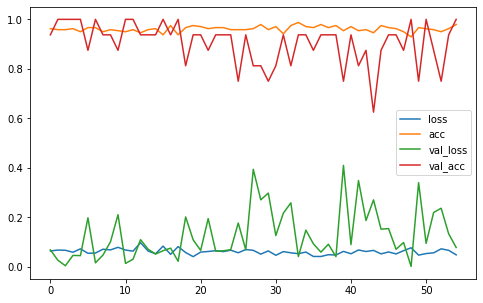

In [ ]:
# eğitim sürecini  grafiği
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
# Eğitim sürecinin grafiksel görüntülenmesi

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['val_acc'], name="val acc"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history.history['acc'], name="acc"),
    secondary_y=True,
)


fig.update_layout(
    title_text="Loss/Accuracy of LSTM Model"
)


fig.update_xaxes(title_text="Epoch")


fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

In [ ]:
#  Eğitim sonucundaki değerler tutulur.
model.save('eğitim_11_5_model.h5') ## tensorflow uzantısı m5

In [ ]:
# Test veri setindeki veriler normalize edildi.
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

In [ ]:

test_generator = test_datagen.flow_from_directory(
        test_aug_dir,
        target_size=(224, 224),
        batch_size=16,
        )

Found 1320 images belonging to 4 classes.


In [ ]:
#Test verileri modele gösterilerek toplam başarı hesaplandı.
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)




C:\Users\ibrah\AppData\Local\Temp\ipykernel_6572\628990453.py:2: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



test acc: 0.8725000023841858
test loss: 0.17840701341629028
